In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

In [12]:
def global_linear_transmation(im,c=0.0,d=255.0):
    img=im.copy()
    maxV = np.float32(img.max())
    minV = np.float32(img.min())
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i, j] = ((d-c) / (maxV - minV)) * (img[i, j] - minV)+c#img[i,j]代表的是某像素点三通道的值
    return np.uint8(img)

In [13]:
# 添加高斯噪声
def addGaussianNoise(src,mu,sigma):
    NoiseImg=src.copy()
    NoiseImg=NoiseImg/NoiseImg.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(mu,sigma) 
#             NoiseImg[i,j]=NoiseImg[i,j]+np.random.normal(mu,sigma) 
    maxV = NoiseImg.max()
    minV = NoiseImg.min()
    for i in range(NoiseImg.shape[0]):
        for j in range(NoiseImg.shape[1]):
            NoiseImg[i, j] =(1 / (maxV - minV)) * (NoiseImg[i, j] - minV)
    img=np.uint8(NoiseImg*255)
    return img

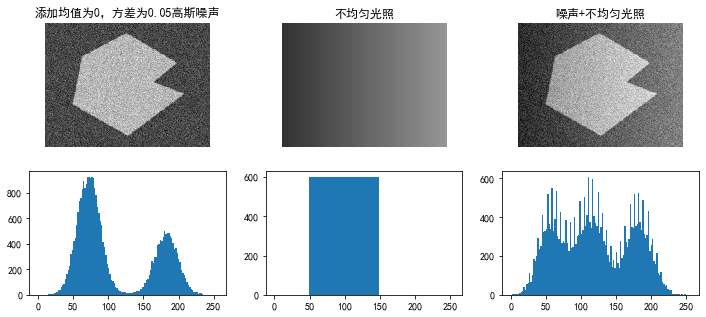

In [14]:
img = cv2.imread(r"..\img\ch08-4(a).jpg",0)
img0=cv2.resize(img,(200,150))
h,w=img0.shape
img_G = addGaussianNoise(img0,0,0.05)#给图像添加高斯噪声
plt.figure(figsize=(12,5))
plt.subplot(231)
plt.axis("off")
plt.imshow(img_G,vmin=0,vmax=255,cmap='gray')
plt.title('添加均值为0，方差为0.05高斯噪声')
plt.subplot(234)
# h1=histogram(img_G)
# plt.bar(range(256),h1)
img_G1=img_G.reshape(-1,1)
countG,binsG,_=plt.hist(img_G1,bins=128) 

img_l=np.zeros((h,w),np.float32)
for i in range(w):
    img_l[0:h,i]=np.float32(i)/w*100.0+50.0
img_l=np.uint8(img_l)
plt.subplot(232)
plt.axis("off")
plt.imshow(img_l,vmin=0,vmax=255,cmap="gray")
plt.title('不均匀光照')
plt.subplot(235)
# h2=histogram(img_l)
# plt.bar(range(256),h2)
img1=img_l.reshape(-1,1)
countG,binsG,_=plt.hist(img1,bins=128,range=(0,255)) 

img_all=np.float32(img_G)+np.float32(img_l)
img_all1=global_linear_transmation(img_all)
plt.subplot(233)
plt.axis("off")
plt.imshow(img_all1,vmin=0,vmax=255,cmap="gray")
plt.title('噪声+不均匀光照')
plt.subplot(236)
# h3=histogram(img_all1)
# plt.bar(range(256),h3)
# plt.plot(h3)
img1=img_all1.reshape(-1,1)
countG,binsG,_=plt.hist(img1,bins=128,range=(0,255))
